# ESTADÍSTICAS DESCRIPTIVAS
En este documento se muestra un ejemplo de como descargar información de https://finance.yahoo.com/cryptocurrencies/.
Concretamente se trabaja con crypto monedas y se generan reportes básicos de estadística descriptiva.

Inicialmente, es necesario descargar las librerías que serán utilizadas, las cuales previamente fueron installadas (pip install).

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()

A continuación, se utiliza la función de yfinance para descargar los datos históricos de tres
criptomonedas: Ethereum (https://ethereum.org/en/), Ripple (https://www.ripple.com/) y 
Bitcoin (https://bitcoin.org/en).    

In [2]:
RISKY_ASSET = ['ETH-USD', 'XRP-USD', 'BTC-USD']
START_DATE = '2017-01-01'
END_DATE = '2022-06-10'

Con estos datos se crea el data frame (df) o base de datos.

In [3]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

[*********************100%***********************]  3 of 3 completed


En base a los precios de cierre, se calculan los rendimientos diarios de cada activo y se eliminan las celdas que no tienen datos.

In [4]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'

In [5]:
returns.head()

,BTC-USD,ETH-USD,XRP-USD
Date,,,
2017-11-10,-7.355415,-6.741069,-5.060049
2017-11-11,-3.936756,5.155507,1.911532
2017-11-12,-6.410128,-2.152342,-6.221070
2017-11-13,10.242240,2.860599,3.092652
2017-11-14,1.162587,6.603711,3.137497


A continuación, se grafican los rendimientos de cada una de las series de tiempo.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

<Figure size 1008x576 with 0 Axes>

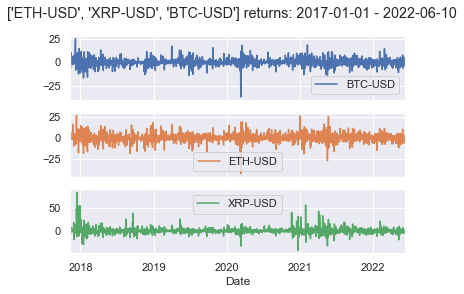

In [6]:
plt.figure(figsize=(14,8))
returns.plot(subplots = True, title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')


Python permite calcular estadísticas descriptivas, a continuación, se presentan algunos ejemplos con la media, la mediana y un cuadro resumen que incluye la desviación estándar, máximo, mínimo, y cuartiles.

In [7]:
returns.mean()

BTC-USD    0.167650
ETH-USD    0.230788
XRP-USD    0.255156
dtype: float64

In [8]:
returns.median()

BTC-USD    0.161862
ETH-USD    0.148414
XRP-USD   -0.096950
dtype: float64

In [9]:
returns.describe()

,BTC-USD,ETH-USD,XRP-USD
count,1674.000000,1674.000000,1674.000000
mean,0.167650,0.230788,0.255156
std,4.072361,5.091731,6.913665
min,-37.169539,-42.347221,-42.334007
25%,-1.622294,-2.180682,-2.374362
50%,0.161862,0.148414,-0.096950
75%,1.909878,2.796934,2.140561
max,25.247169,26.458071,83.470793


También es posible calcular el coeficiente de correlación.

In [10]:
corr = returns.corr()
corr

,BTC-USD,ETH-USD,XRP-USD
BTC-USD,1.000000,0.762017,0.502298
ETH-USD,0.762017,1.000000,0.603740
XRP-USD,0.502298,0.603740,1.000000


Una gráfica que suele ser muy útil, es el mapa de calor (heatmap) que se calcula tomando los coeficientes de correlación.

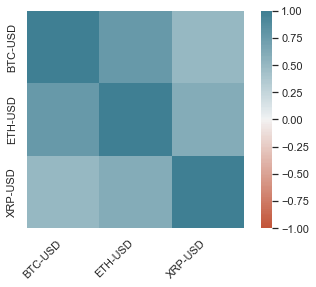

In [11]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);